In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import os
import random
import math
import pandas as pd
import scipy
import numpy.ma as ma
import itertools
from networkx.algorithms import bipartite
import community
# from infomap import infomap
import os
import rpy2.robjects as robjects

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [3]:
data_total=ldata('crimen/red_crimenes')
sexos = ldata('crimen/moreno_crime/ent.moreno_crime_crime.person.sex')
nombres = ldata('crimen/moreno_crime/ent.moreno_crime_crime.person.name')
roles = ldata('crimen/moreno_crime/rel.moreno_crime_crime.person.role')

In [4]:
crimenes=[]
personas=[]
red_cr = []
usadosp = []
usadosc = []

for i in data_total:
    if i[1] not in usadosc:
        crimenes.append(i[1]+'cr')
        usadosc.append(i[1])
    if i[0] not in usadosp:
        usadosp.append(i[0])
        personas.append(i[0])
    red_cr.append([i[0],i[1]+'cr']) # En su primer elemento contiene un número que indica a la persona.
                                 # almacenado esto mismo en lista "personas"
                                 # en su segundo elemento un str que contiene al crimen.
                                 # # almacenado esto mismo en lista "crimenes"

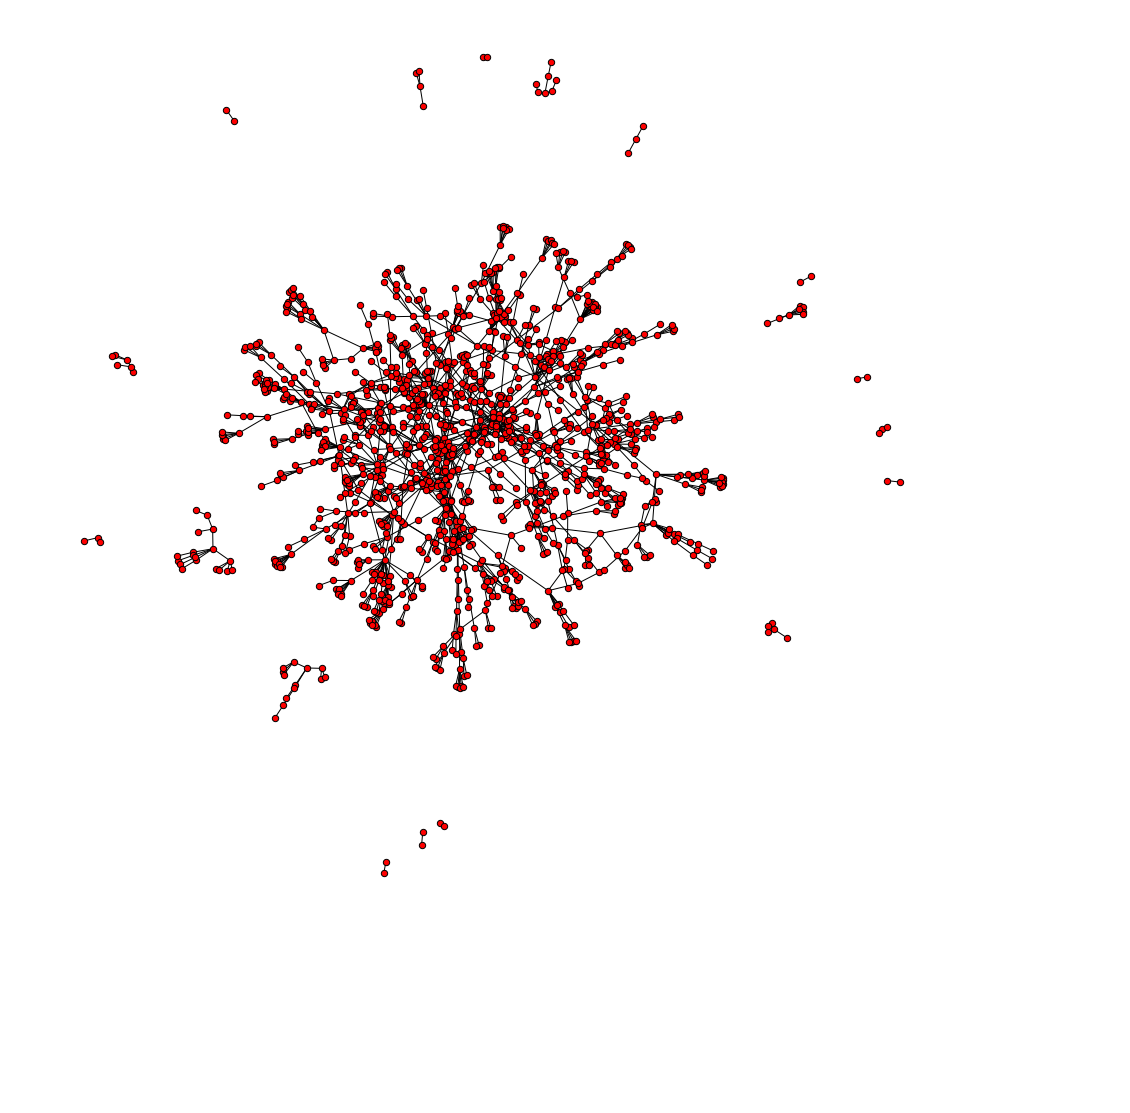

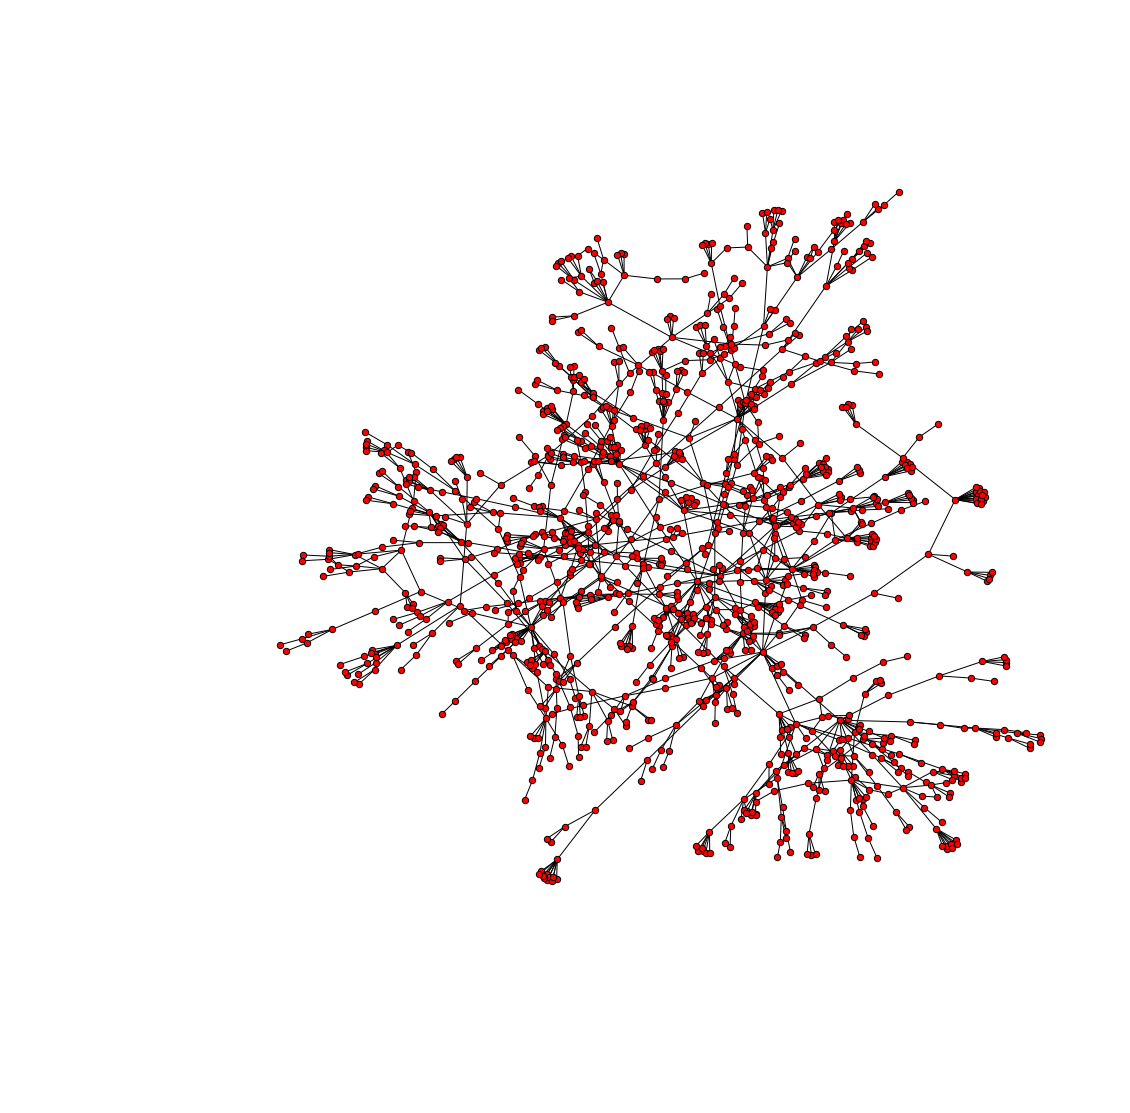

In [21]:
B = nx.Graph()
B = B.to_undirected()
# Asigna dos valores de bipartición (0 y 1) para cada tipo de nodo (personas, crimenes)
B.add_nodes_from(personas, bipartite=0)
B.add_nodes_from(crimenes, bipartite=1)
# Agrega un enlace entre nodos de biparticiones diferentes.
B.add_edges_from(red_cr)

plt.figure(figsize=(15,15))
nx.draw(B,node_size = 40,with_labels=False, font_weight='bold')
plt.show()

Bmax = max(nx.connected_component_subgraphs(B), key=len)
Bmax = Bmax.to_undirected()
plt.figure(figsize=(15,15))
nx.draw(Bmax,node_size = 40,with_labels=False, font_weight='bold')
plt.show()

In [30]:
#Asignacion universal de atributos (AUA)
for i in range(2):
    if '1' in bipartite.sets(Bmax)[i]:
        
        for node in bipartite.sets(Bmax)[i]:
            Bmax.node[node]['color']='red'
            Bmax.node[node]['nombre']=nombres[int(node)-1]
            Bmax.node[node]['sexo']=sexos[int(node)-1]
    else:
        for node in bipartite.sets(Bmax)[i]:
            Bmax.node[node]['color']='blue'

for edge in Bmax.edges:
    if [str(edge[0]),str(edge[1])] in red_cr:
        Bmax.edges[edge]['rol']=roles[red_cr.index([str(edge[0]),str(edge[1])])]
    else:
        Bmax.edges[edge]['rol']=roles[red_cr.index([str(edge[1]),str(edge[0])])]

In [34]:
Bmax.edges[('1','2cr')]['rol']

['Victim']

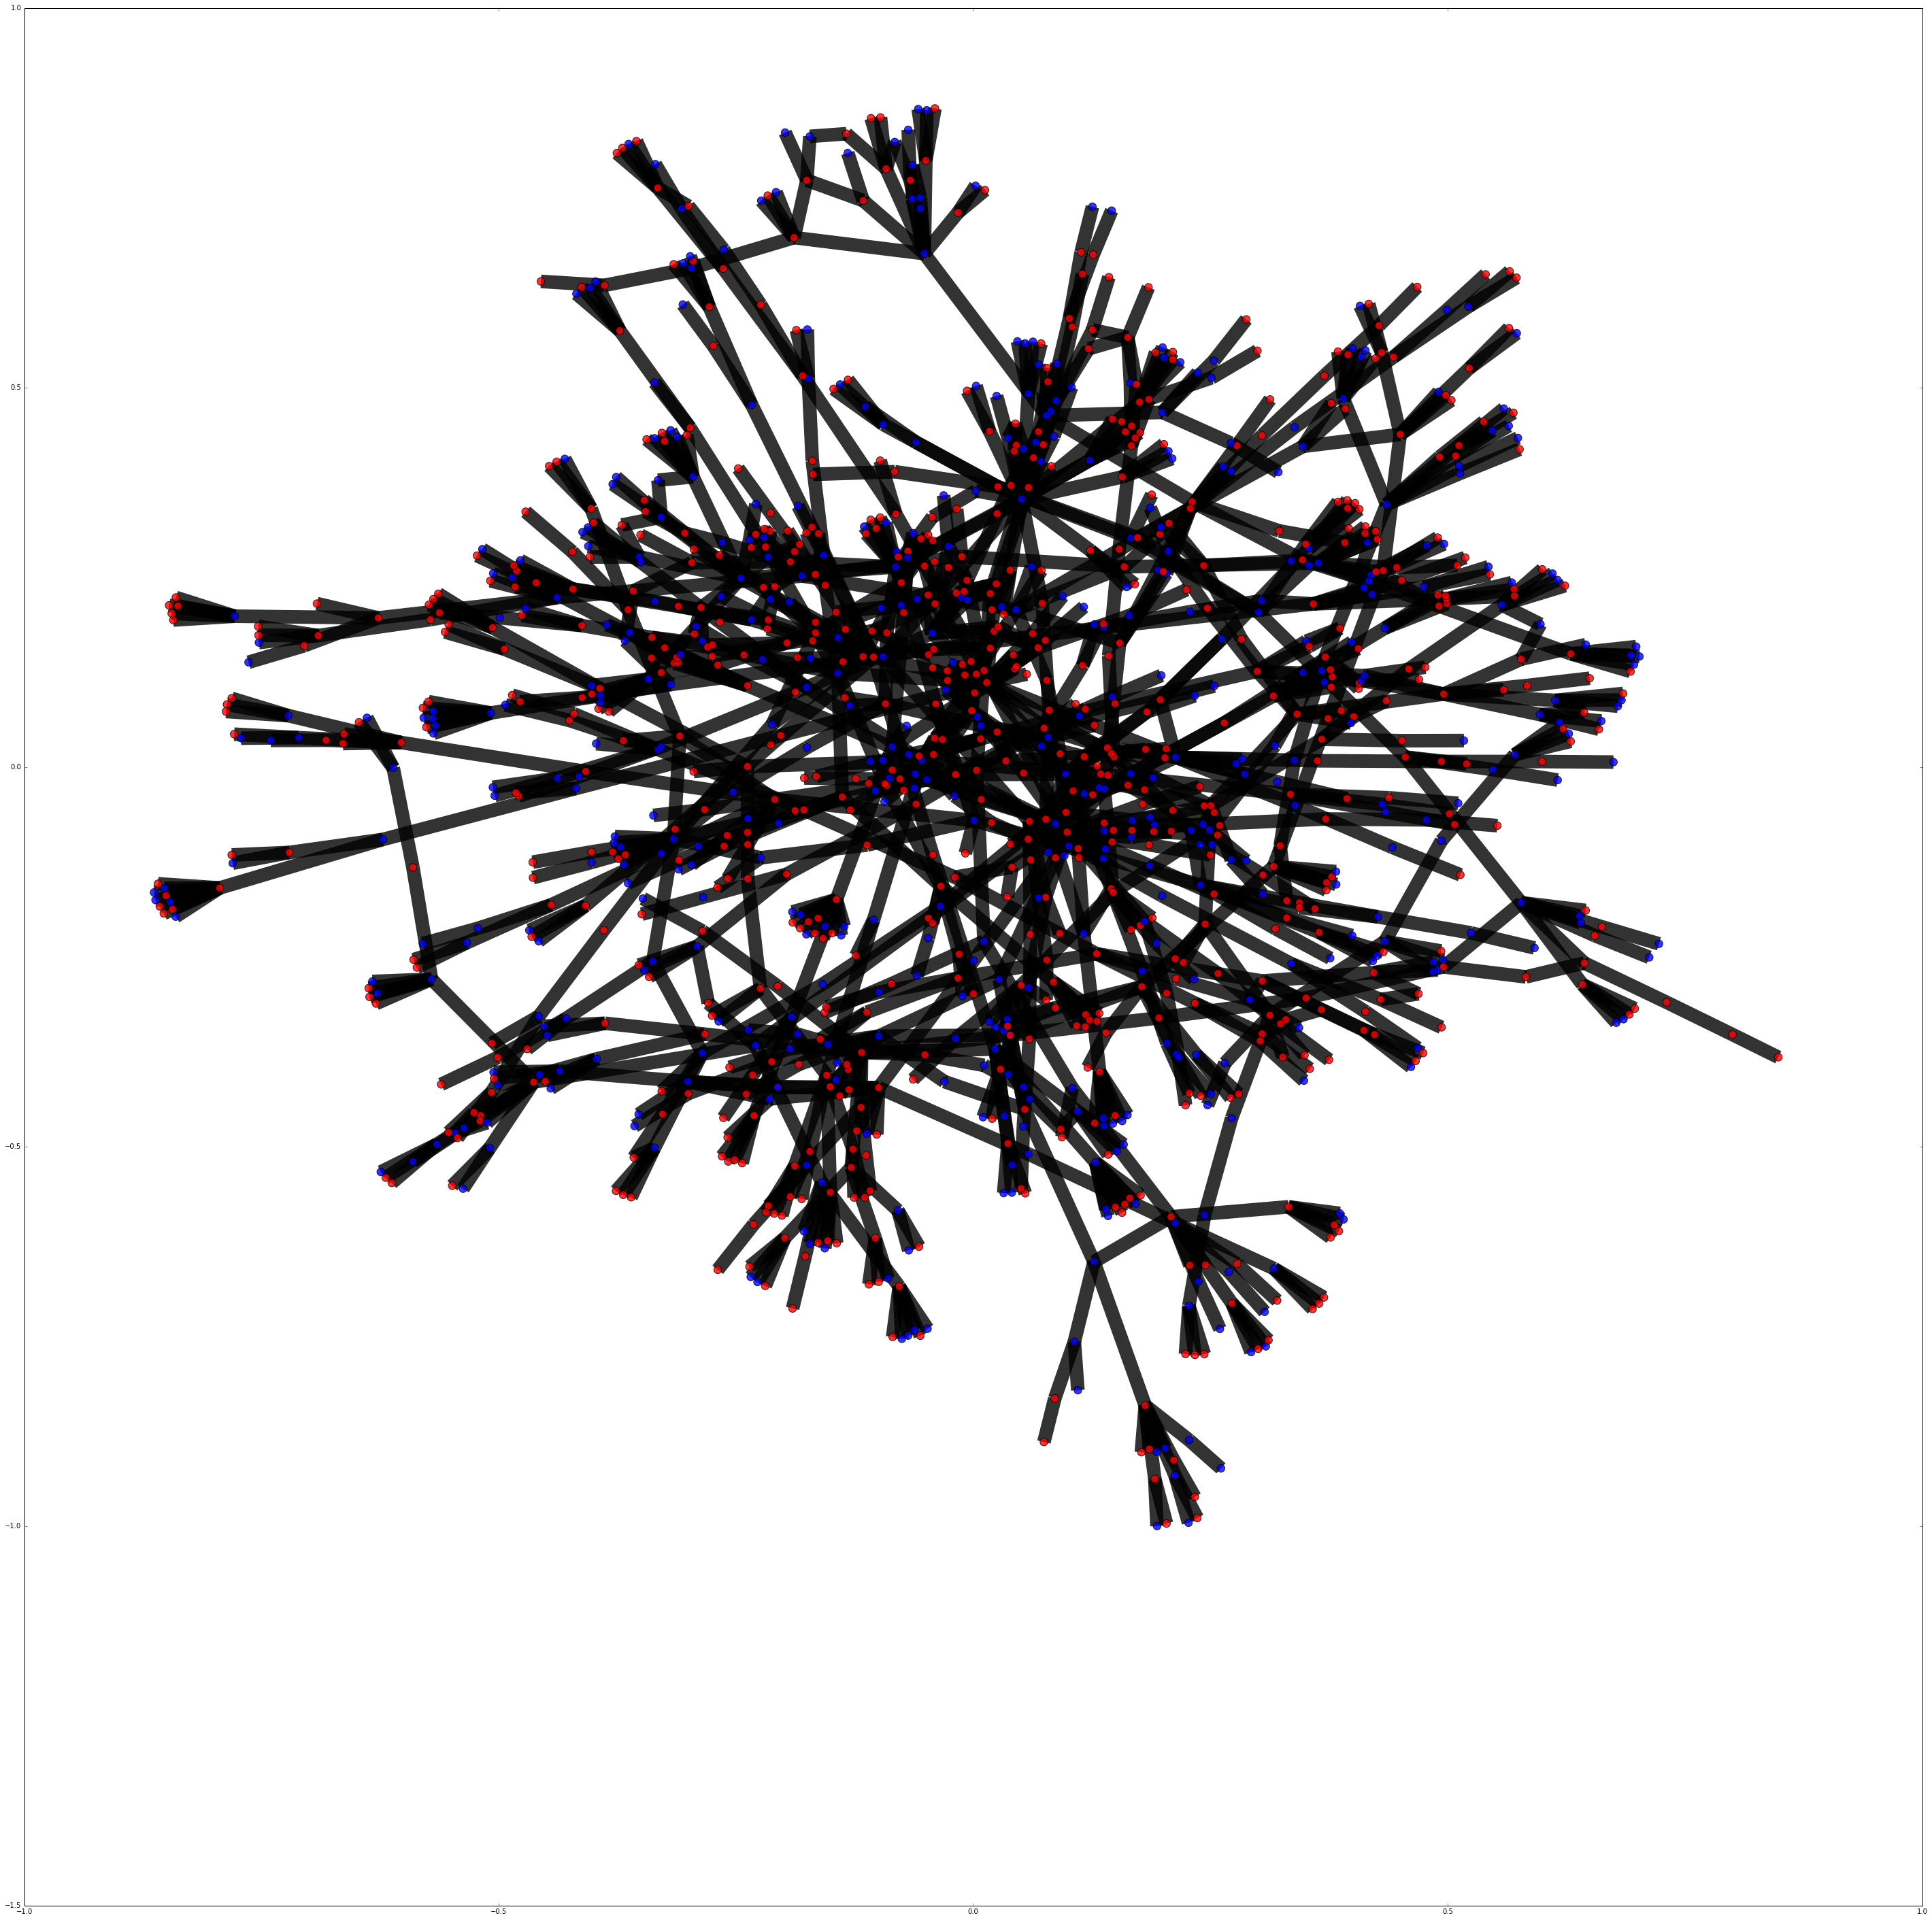

In [7]:
plt.figure(figsize=(50,50))
nx.draw_networkx(Bmax, node_color=list(nx.get_node_attributes(Bmax, "color").values()),
                 node_size=130,
                 width=20,
                 alpha=0.8,
                 with_labels=False)
plt.show()

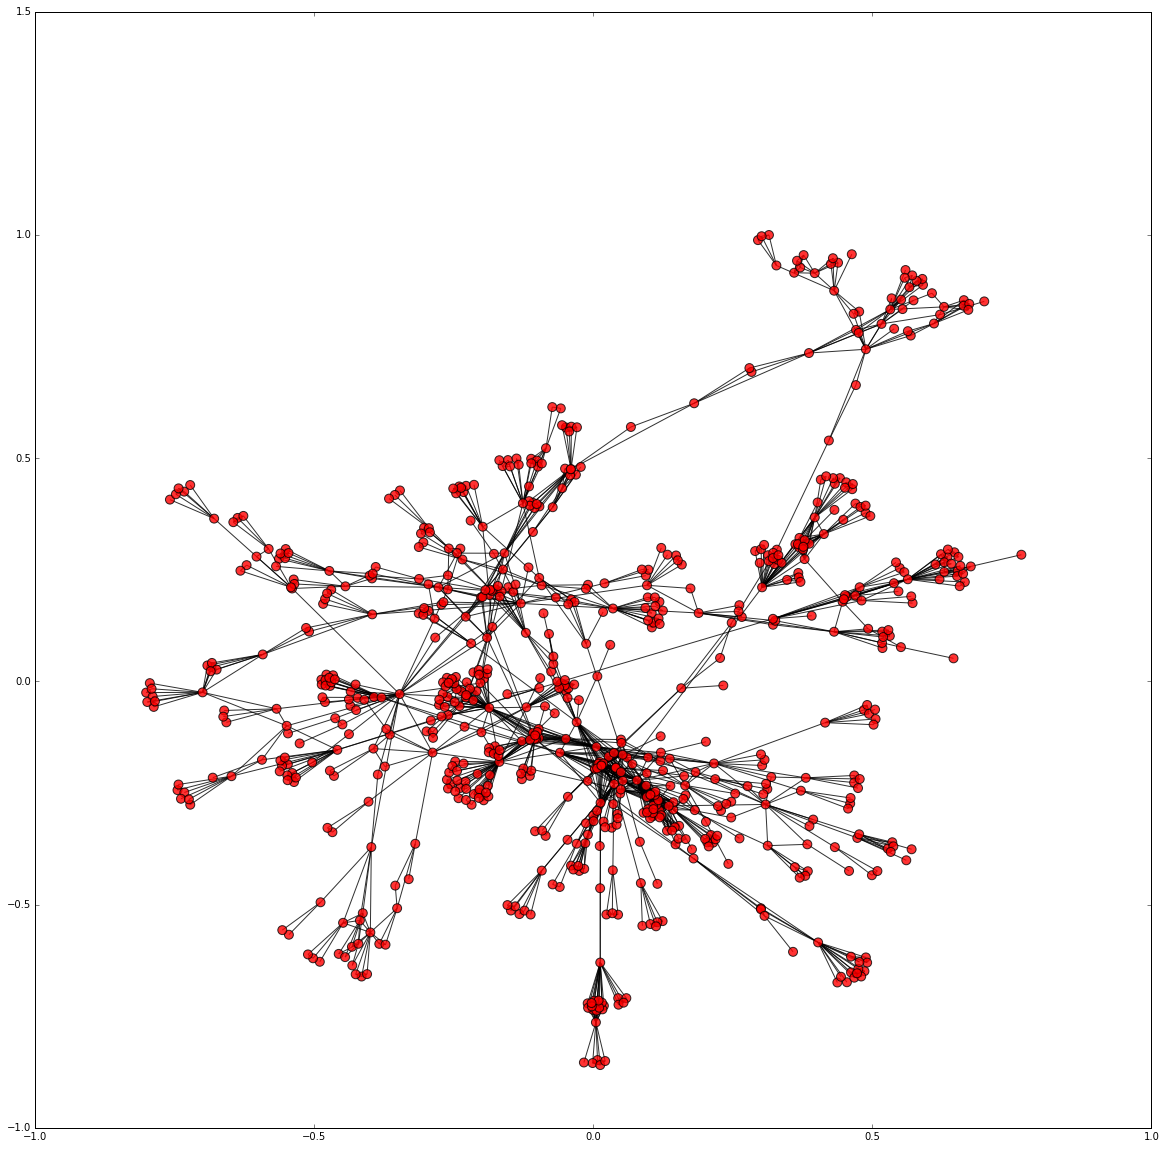

In [8]:
PP = max(nx.connected_component_subgraphs(nx.algorithms.bipartite.projection.weighted_projected_graph(B, personas, ratio=False)), key=len)
PP = PP.to_undirected()
for node in PP.nodes:
    if node in personas:
#         print("hola")
        PP.node[node]['color']='red'
        PP.node[node]['nombre']=nombres[int(node)-1]
#         PP.node[node]['rol']=roles[node-1]
        PP.node[node]['sexo']=sexos[int(node)-1]
    elif node in crimenes:
#         print('FUNCIONA!!!')
        PP.node[node]['color']='blue'

plt.figure(figsize=(20,20))
nx.draw_networkx(PP, node_color=list(nx.get_node_attributes(PP, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.show()

In [9]:
gradosPP = PP.degree(list(PP.nodes()))
gpersPP=[]
gcrimPP = []
for node in PP.nodes:
    if node in personas:
        gpersPP.append(gradosPP[node])

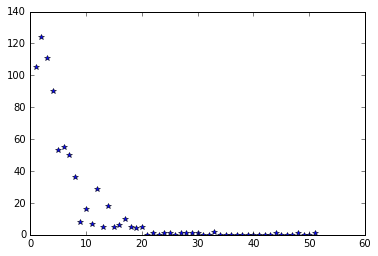

In [10]:
nro=np.linspace(1,max(gpersPP),max(gpersPP))
gradpers=np.zeros(len(nro))

for i in range(len(nro)):
    for g in gpersPP:
        if g==i+1:
            gradpers[i]=gradpers[i]+1
plt.plot(nro,gradpers,'*')
plt.show()

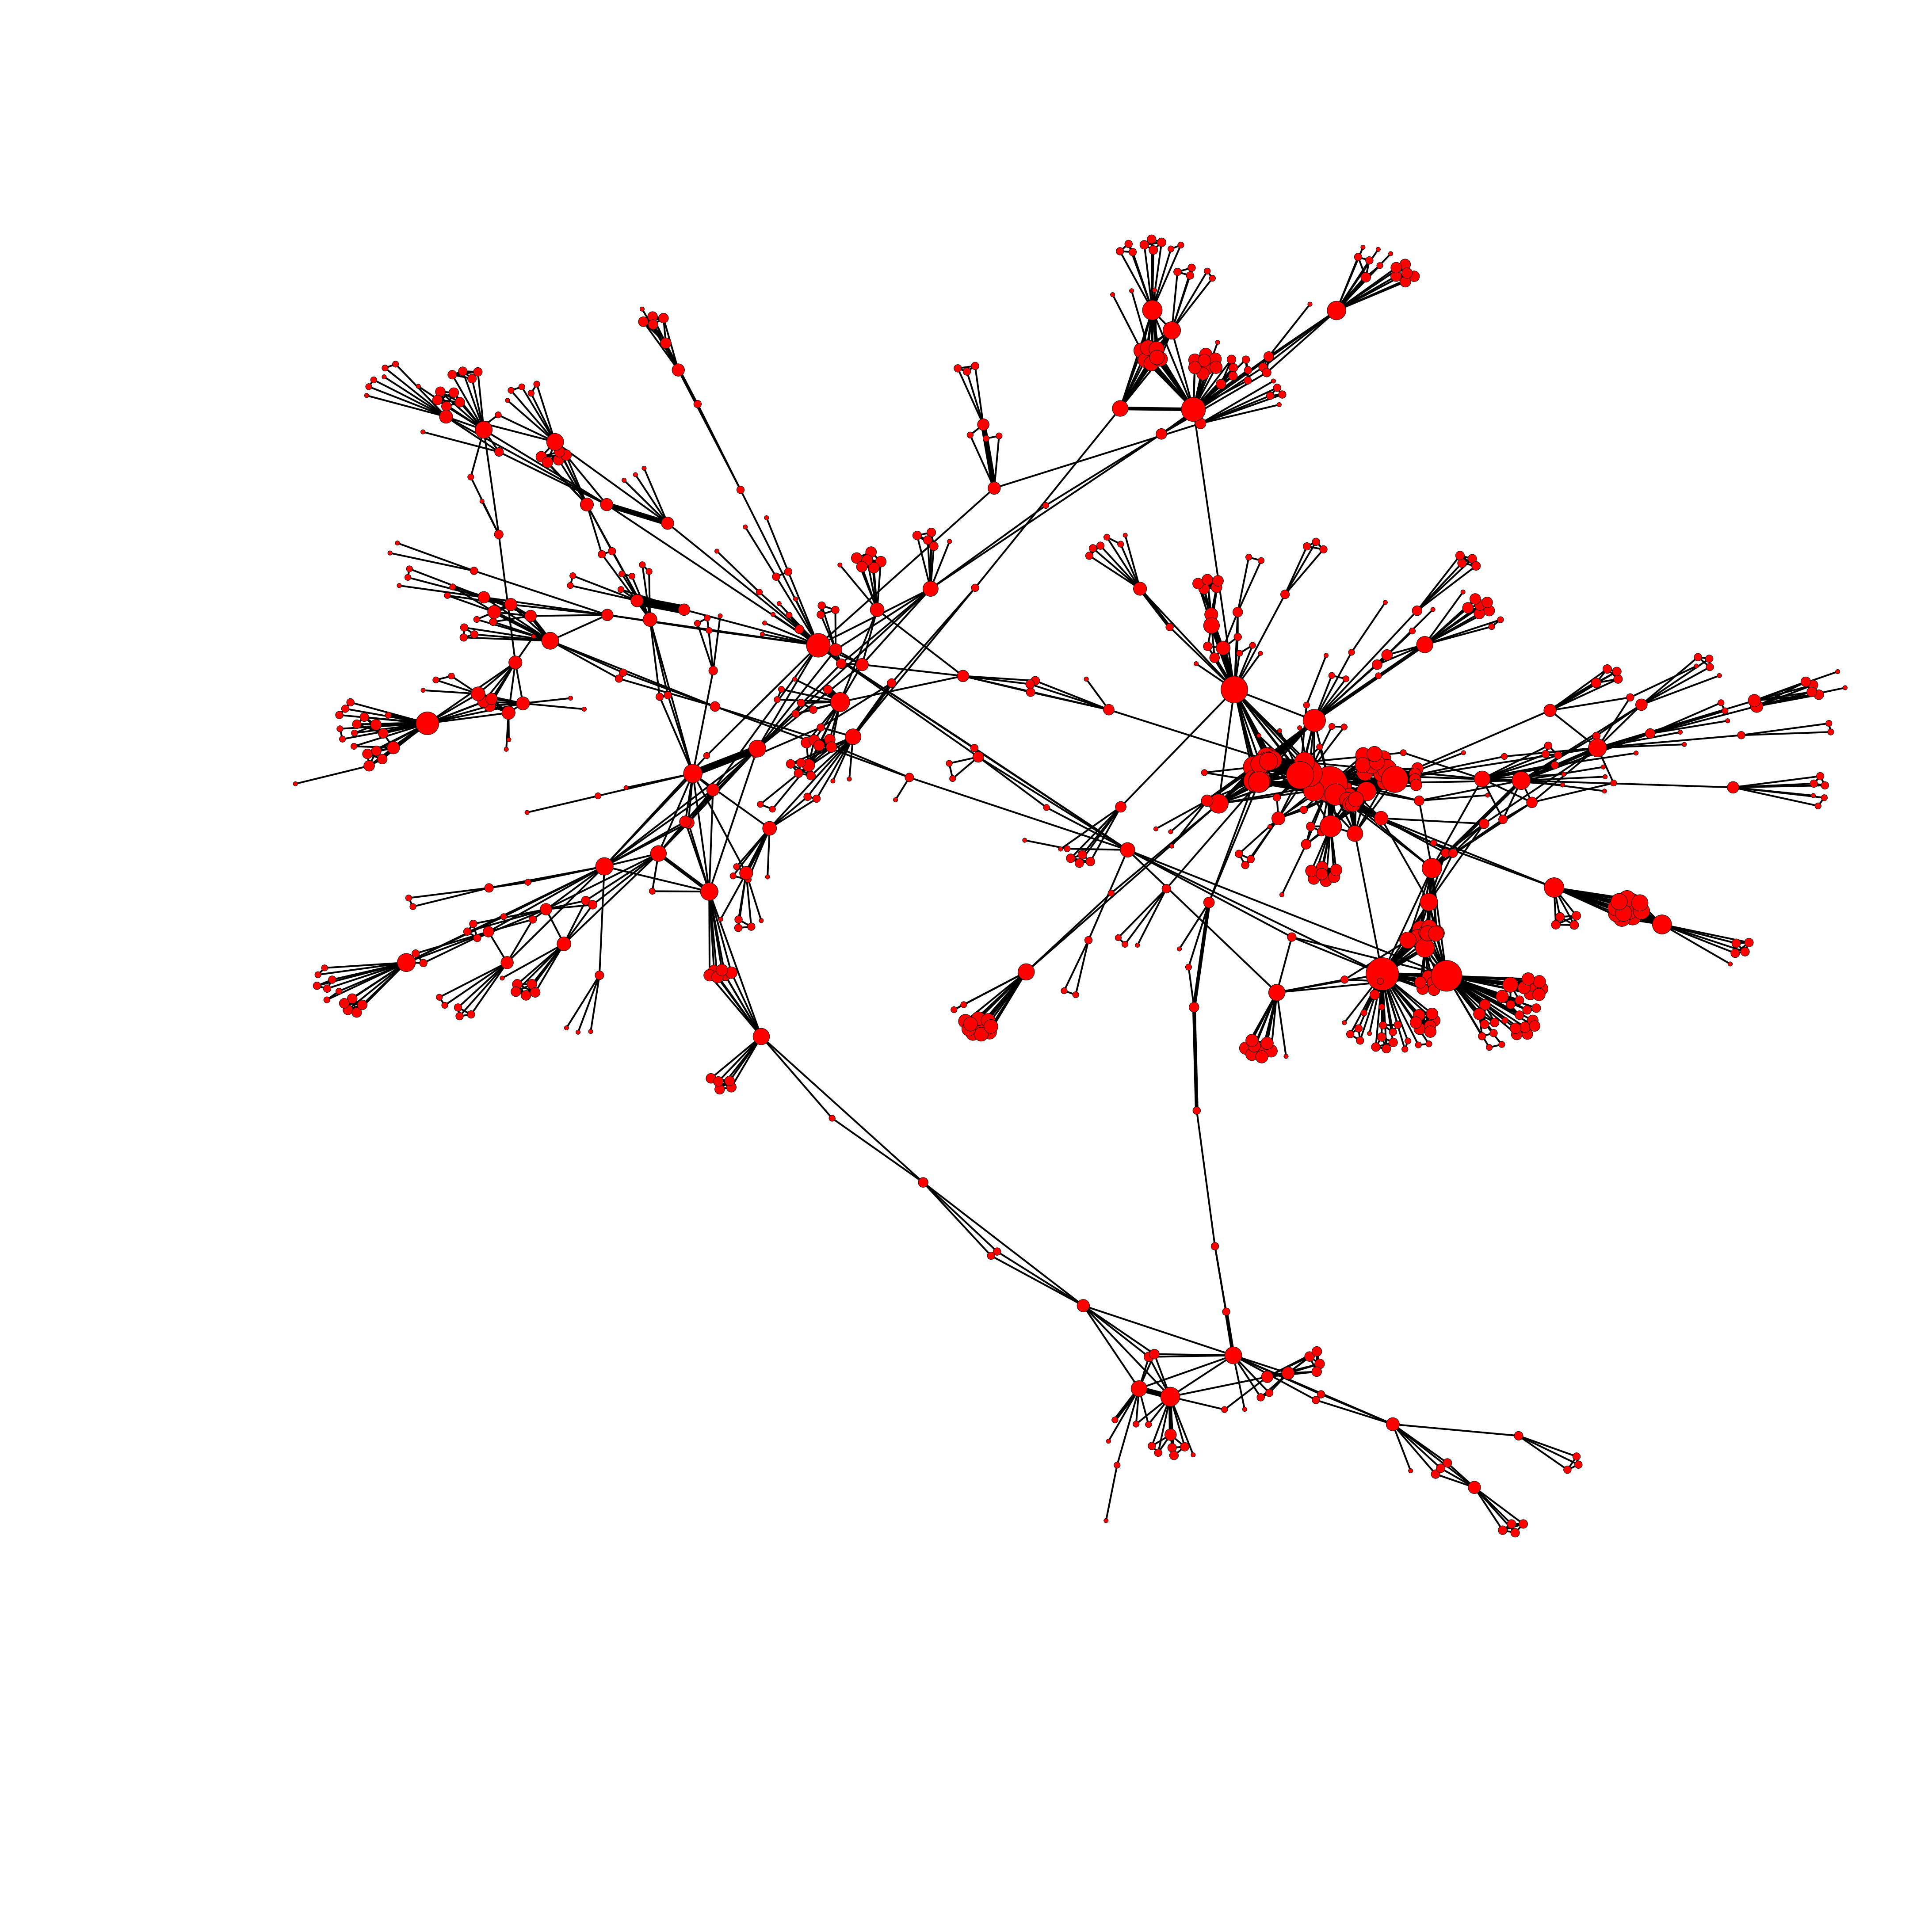

In [11]:
d = dict(nx.degree(PP,weight='weight'))
plt.figure(figsize=(60,60))
nx.draw(PP, nodelist=d.keys(), edgelist=list(nx.get_edge_attributes(PP,'weight').keys()), 
        width=[t * 4 for t in nx.get_edge_attributes(PP,'weight').values()], node_size=[v * 100 for v in d.values()])
plt.show()

In [13]:
comunidadesPP = community.best_partition(PP)
mod = community.modularity(comunidadesPP,PP)

AttributeError: module 'community' has no attribute 'best_partition'

In [36]:
plt.figure(figsize=(50,50))
for name,label in comunidadesPP.items():
    PP.nodes()[name]["color"] = label

nx.draw_networkx(PP, nodelist=d.keys(), node_size=[v * 120 for v in d.values()], cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(PP, "color").values()),
                 edgelist=list(nx.get_edge_attributes(PP,'weight').keys()), 
                 width=[t * 1 for t in nx.get_edge_attributes(PP,'weight').values()],
#                  edge_color=['blue' if list(nx.get_edge_attributes(PP,'weight').values())>=5],
                 with_labels=False)
plt.title('Louvain')
# plt.savefig ("Particion_Louvain.png")
plt.show()

NameError: name 'comunidadesPP' is not defined

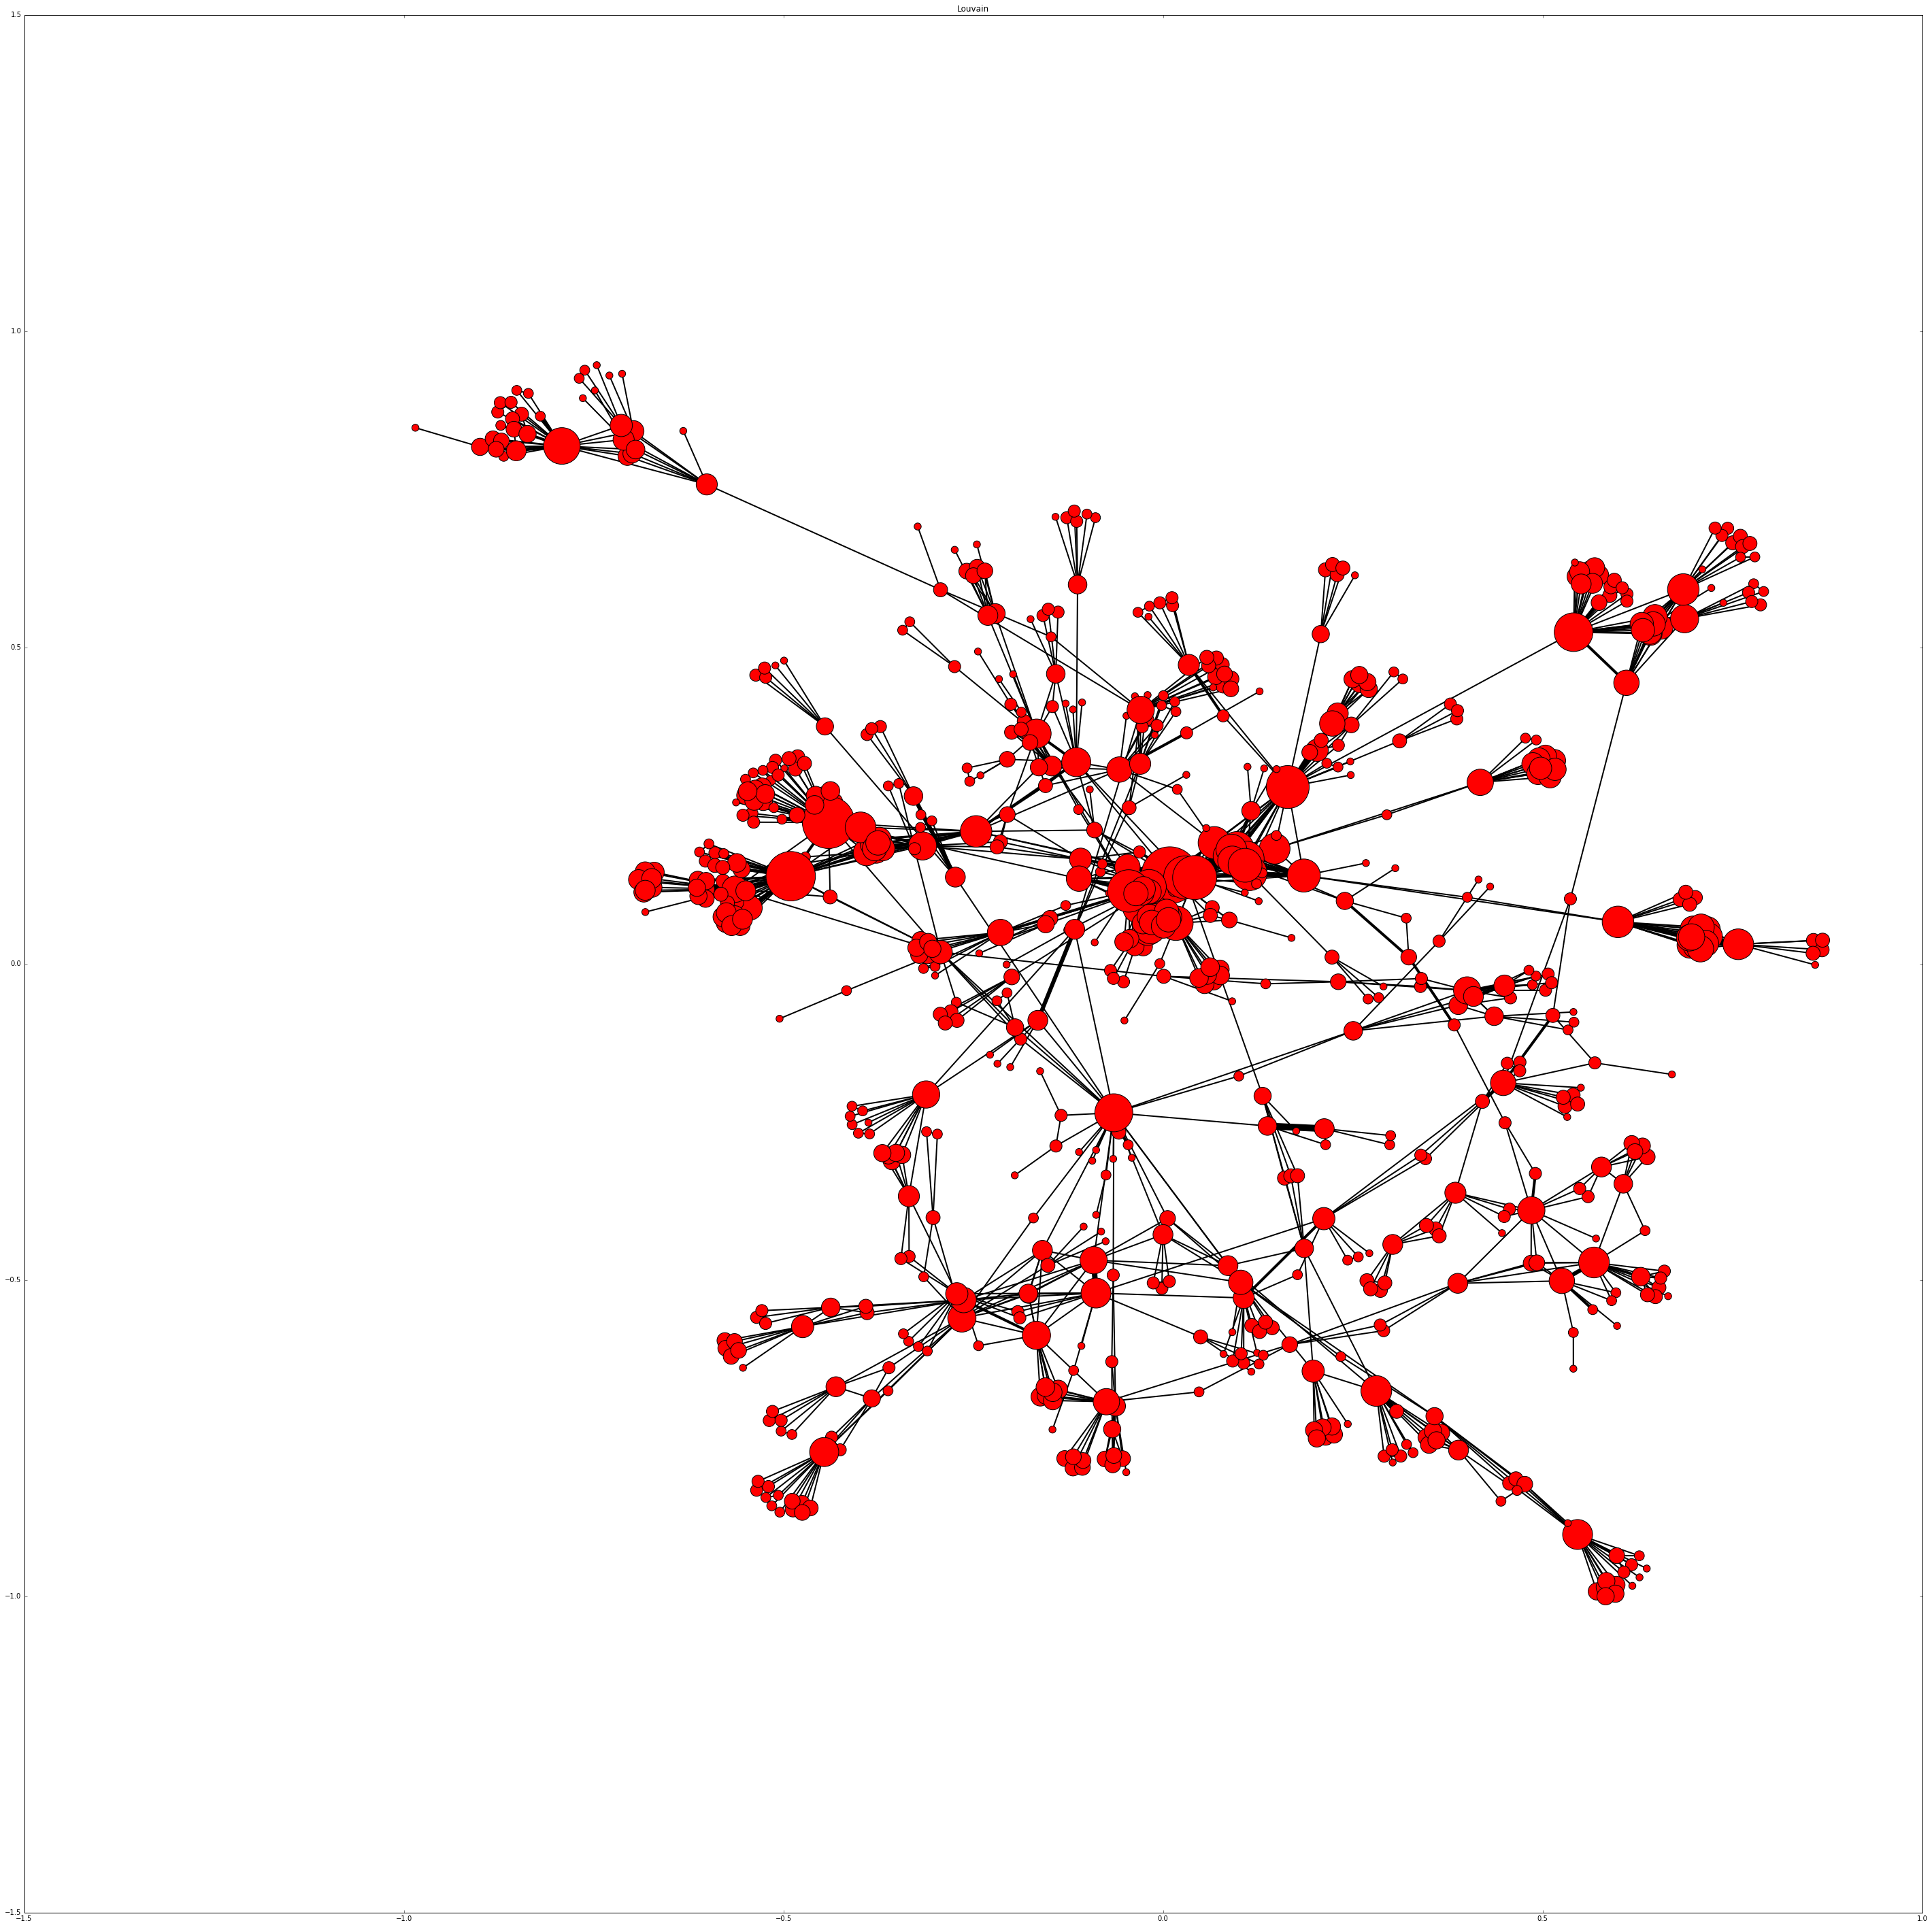

In [12]:
#Busco nodos centrales
#grado PP

centrgradPP = []
for node in PP.nodes:
    centrgradPP.append([node,PP.degree(weight='weight')[node]])
centrgradPP.sort(key=lambda grado: grado[1], reverse=True)
# print(centrgradPP)

plt.figure(figsize=(50,50))
# for name,label in comunidadesPP.items():
#     PP.nodes()[name]["color"] = label

nx.draw_networkx(PP, nodelist=d.keys(), node_size=[v * 7000/max(list(d.values())) for v in d.values()], cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(PP, "color").values()),
                 edgelist=list(nx.get_edge_attributes(PP,'weight').keys()), 
                 width=[t * 10/max(nx.get_edge_attributes(PP,'weight').values()) for t in nx.get_edge_attributes(PP,'weight').values()],
#                  edge_color=['blue' if list(nx.get_edge_attributes(PP,'weight').values())>=5],
                 with_labels=False)
plt.title('Louvain')
# plt.savefig ("Particion_Louvain.png")
plt.show()

In [13]:
#grado BIP
centrgradB = []
for i in range(2):
    if '1' in bipartite.sets(Bmax)[i]:
        for node in bipartite.sets(Bmax)[i]:
            centrgradB.append([node,PP.degree[node]])
centrgradB.sort(key=lambda grado: grado[1], reverse=True)            

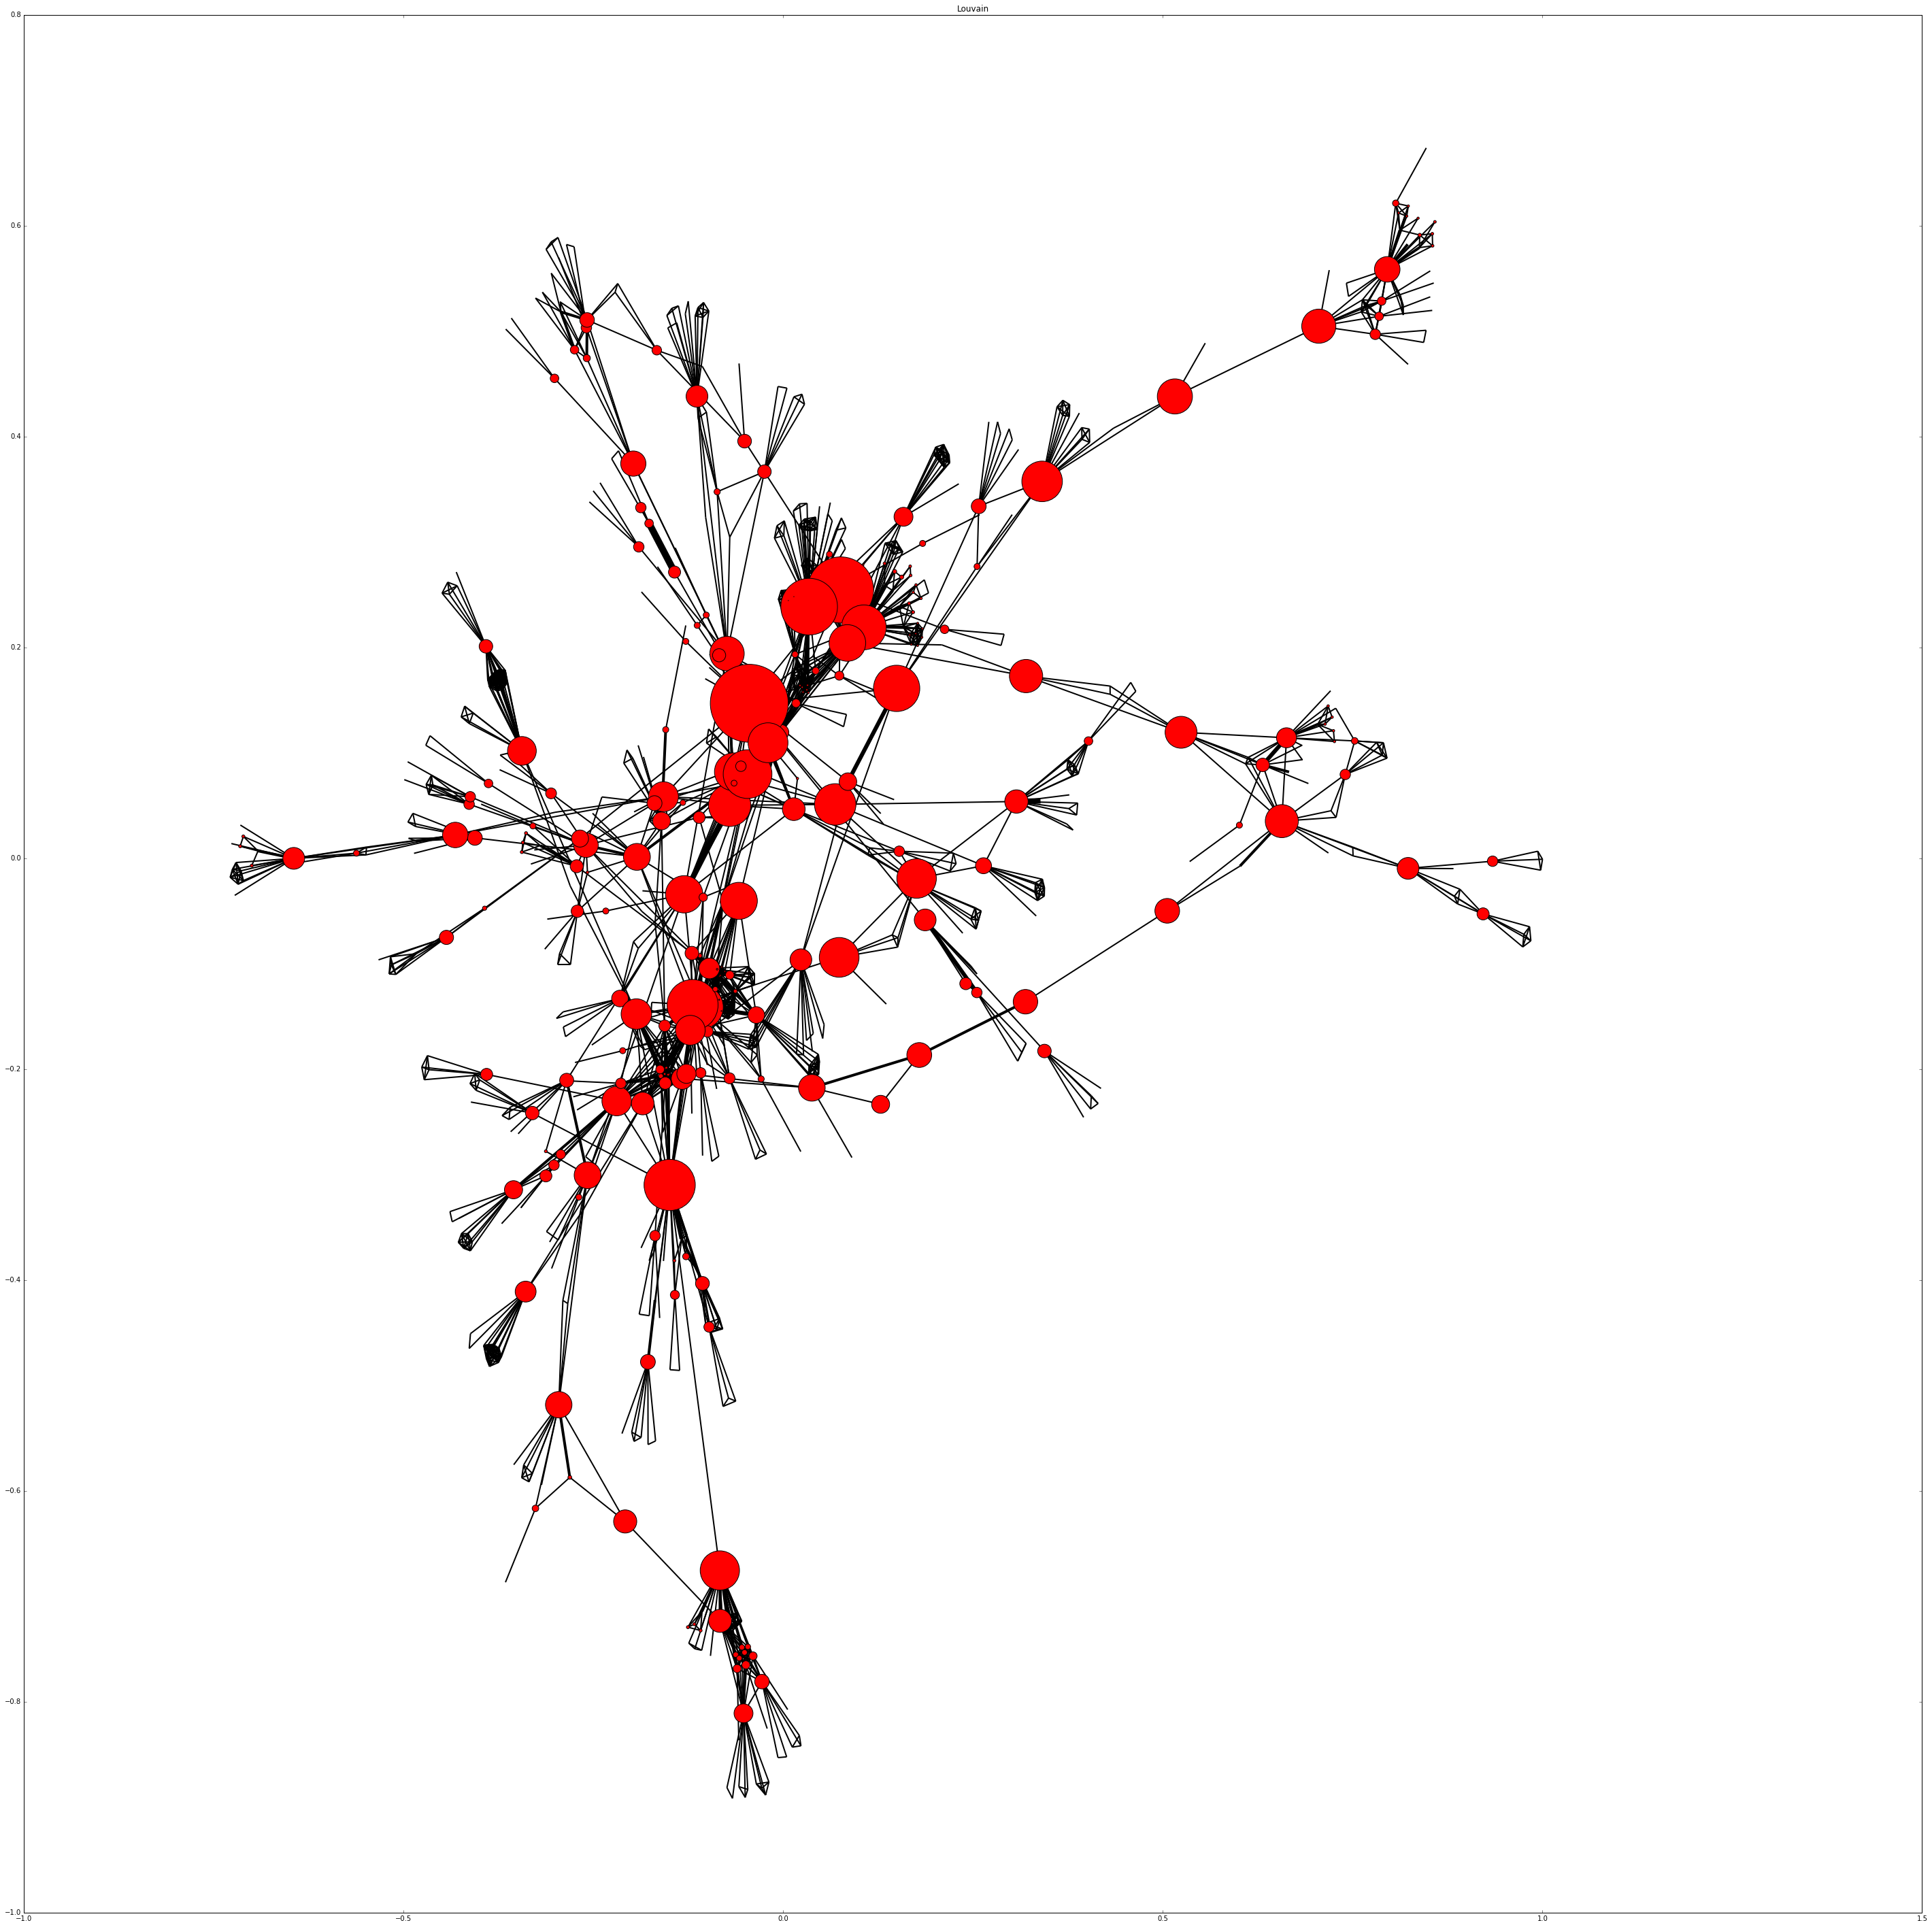

dict_keys(['377', '77', '539', '591', '208', '424', '516', '160', '547', '64', '739', '615', '599', '643', '282', '767', '300', '583', '602', '223', '268', '188', '738', '798', '87', '717', '785', '263', '28', '745', '447', '389', '368', '794', '783', '770', '550', '504', '227', '390', '329', '752', '697', '74', '315', '617', '331', '492', '197', '563', '136', '82', '663', '334', '753', '582', '699', '814', '460', '808', '517', '269', '242', '810', '38', '313', '254', '632', '345', '415', '538', '226', '253', '133', '727', '566', '597', '425', '347', '267', '149', '316', '417', '199', '283', '485', '419', '336', '522', '217', '3', '114', '314', '237', '53', '245', '360', '328', '514', '441', '291', '534', '644', '552', '365', '724', '72', '397', '560', '459', '624', '211', '765', '395', '255', '388', '339', '91', '634', '556', '430', '428', '478', '764', '259', '766', '126', '508', '33', '179', '214', '735', '195', '41', '284', '302', '298', '445', '578', '176', '256', '151', '584', '3

In [14]:
#Betweenness
centrbet = []
bet = nx.betweenness_centrality(PP,weight='weight')
for node in PP.nodes:
    centrbet.append([node,bet[node]])
centrbet.sort(key=lambda betw: betw[1], reverse=True)
# print(bet)
plt.figure(figsize=(50,50))
# for name,label in comunidadesPP.items():
#     PP.nodes()[name]["color"] = label
nx.draw_networkx(PP, nodelist=list(bet.keys()), node_size=[v * 30000 for v in bet.values()], cmap=plt.get_cmap('plasma'),
                 node_color='red',
                 edgelist=list(nx.get_edge_attributes(PP,'weight').keys()), 
                 width=[t * 10/max(nx.get_edge_attributes(PP,'weight').values()) for t in nx.get_edge_attributes(PP,'weight').values()],
#                  edge_color=['blue' if list(nx.get_edge_attributes(PP,'weight').values())>=5],
                 with_labels=False)
plt.title('Louvain')
# plt.savefig ("Particion_Louvain.png")
plt.show()
bet.keys()

In [15]:
bipartite.sets(Bmax)[0]

{'1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '136',
 '137',
 '138',
 '139',
 '14',
 '142',
 '143',
 '144',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '152',
 '154',
 '155',
 '156',
 '159',
 '16',
 '160',
 '161',
 '162',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '17',
 '170',
 '171',
 '173',
 '174',
 '175',
 '176',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '183',
 '184',
 '185',
 '186',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '196',
 '197',
 '199',
 '2',
 '20',
 '200',
 '201',
 '202',
 '203',
 '204',
 '205',
 '207',
 '208',
 '209',
 '21',
 '211',
 '212',
 '213',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '22',
 '220',
 '221',
 '222',
 '223',
 '224',
 '225',
 '226',
 '227',
 '228',
 

# Preguntas
* ¿es correcto realizar un desarmado de la red en base a la centralidad de los nodos para definir qué parametro de centralidad es más importante?
* Observar si se puede obtener informacion de un crimen de personas no involucradas directamente en ese crimen (analizando: Comunidades + Alg. Recomendacion)

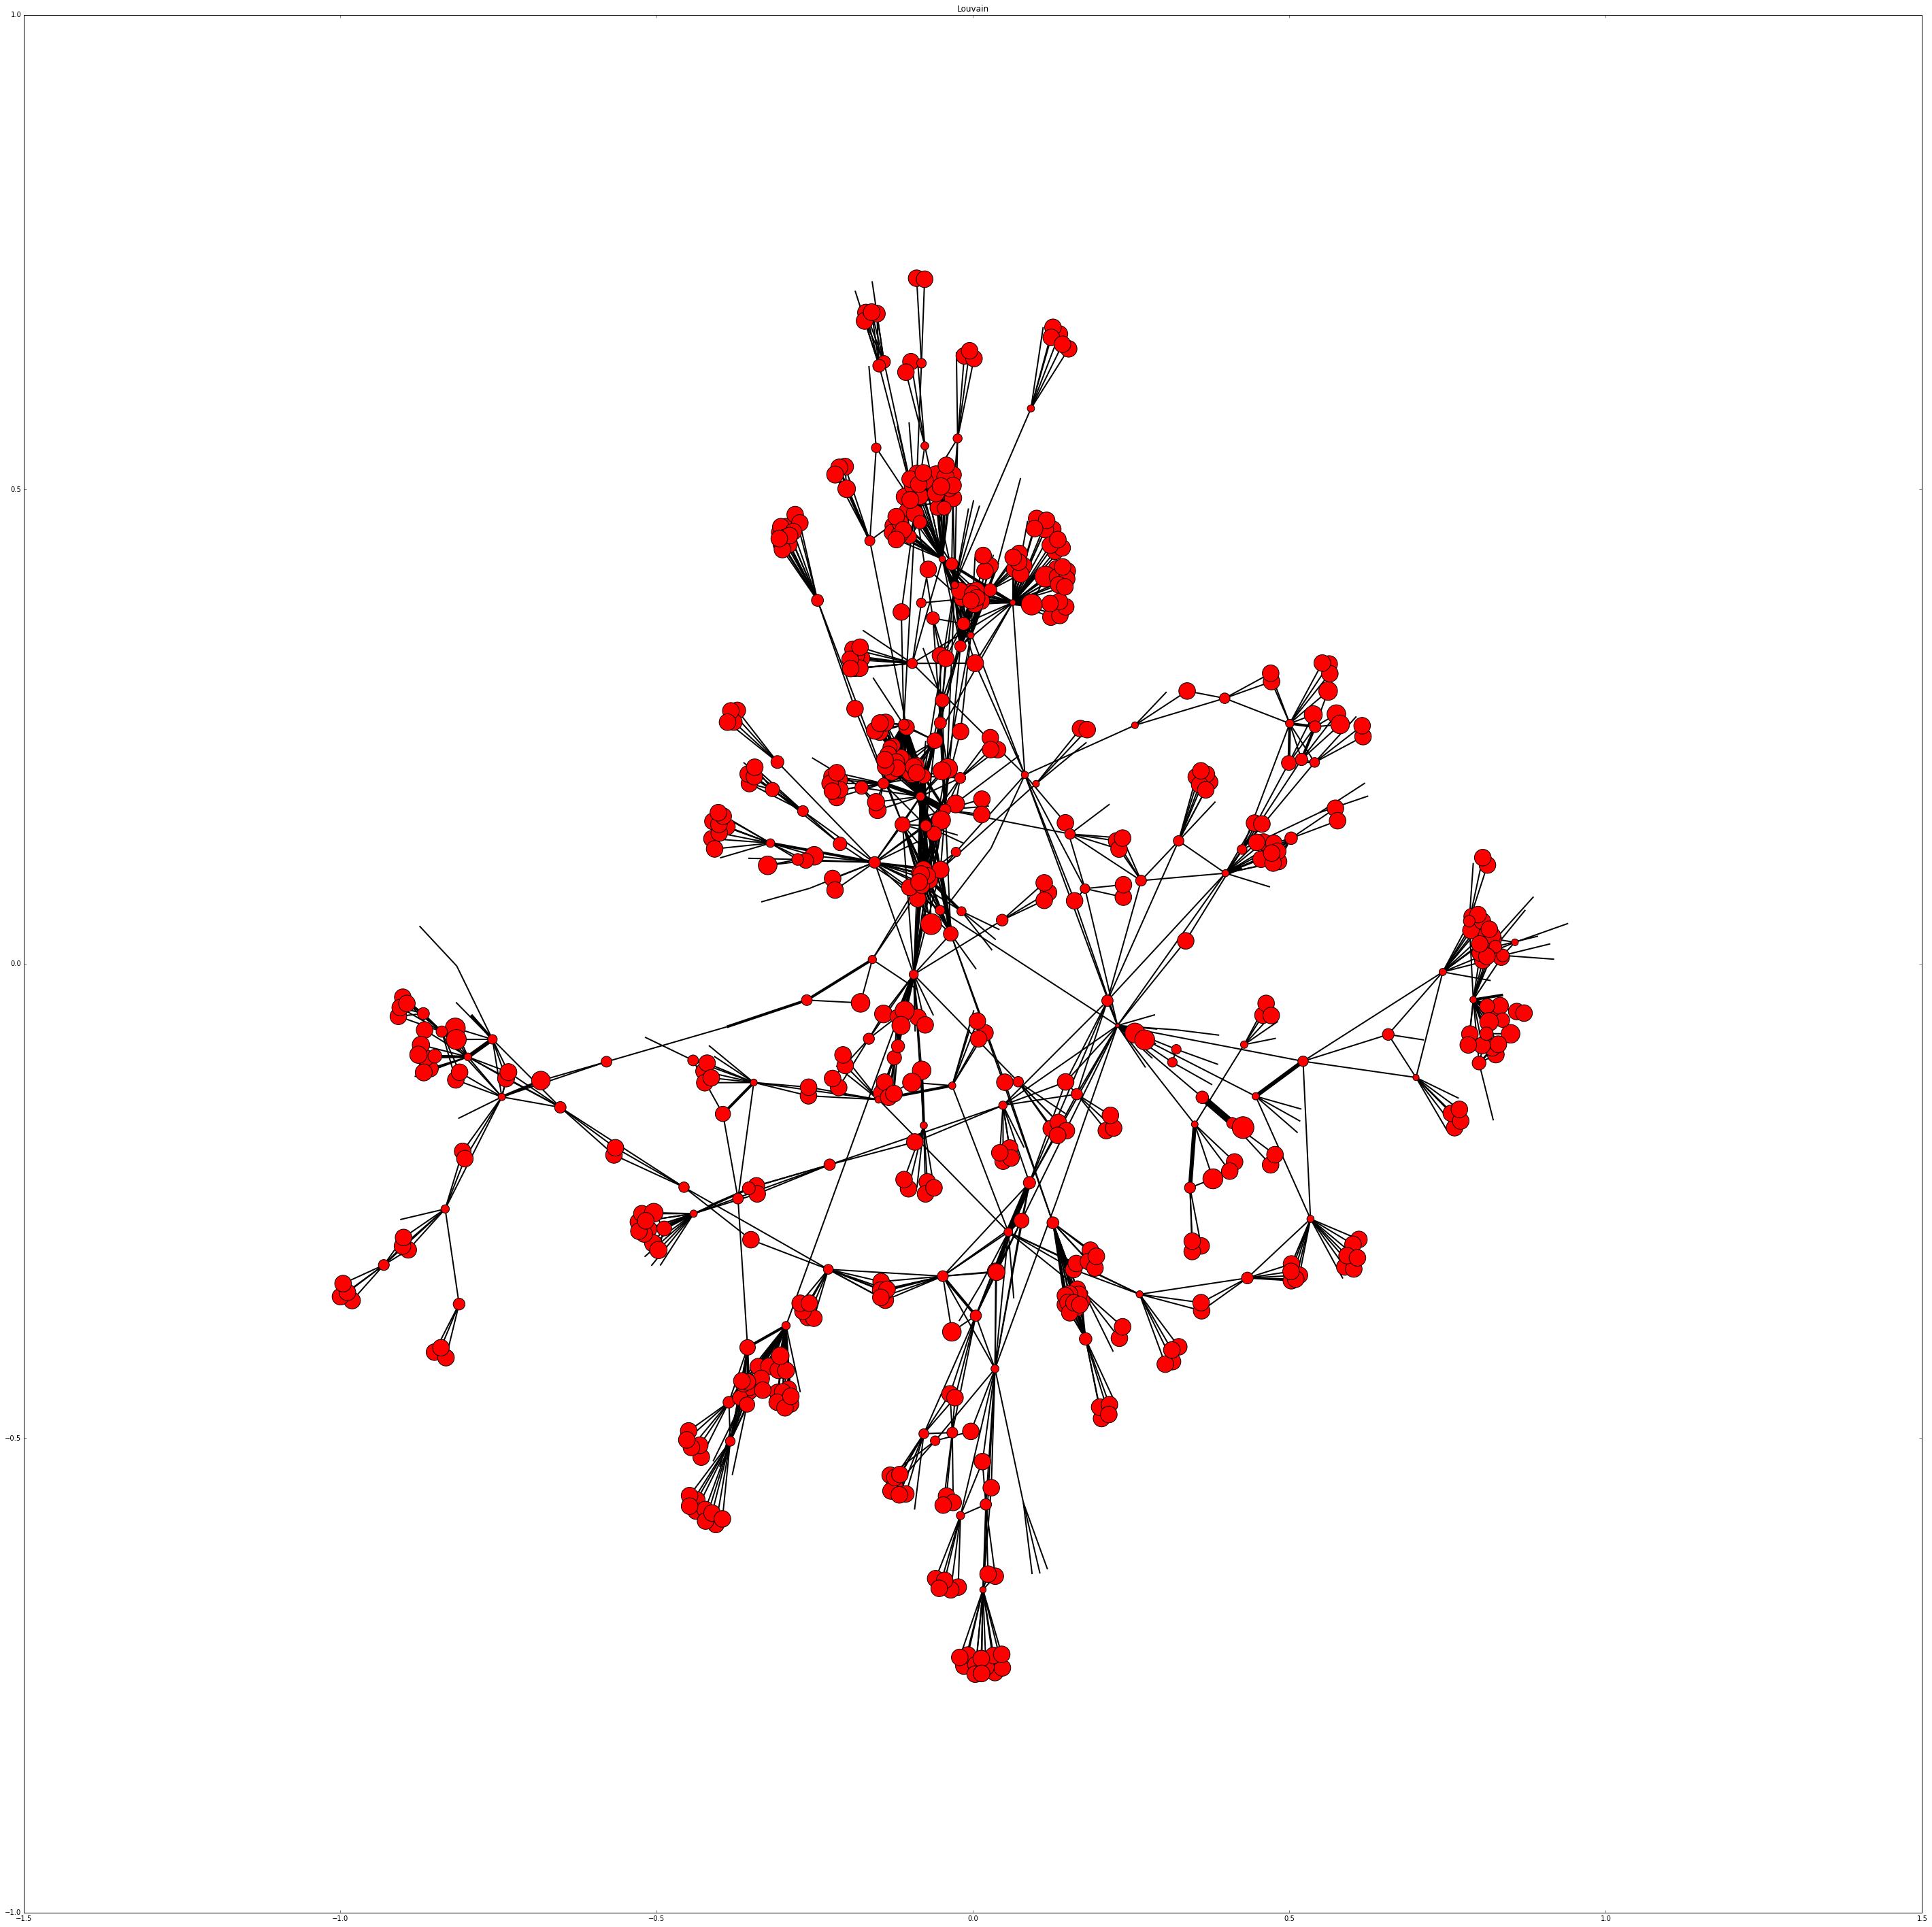

In [16]:
#Clustering
clus = nx.clustering(PP, weight='weight')
plt.figure(figsize=(50,50))
# for name,label in comunidadesPP.items():
#     PP.nodes()[name]["color"] = label
nx.draw_networkx(PP, nodelist=list(clus.keys()), node_size=[v * 3000 for v in clus.values()], cmap=plt.get_cmap('plasma'),
                 node_color='red',
                 edgelist=list(nx.get_edge_attributes(PP,'weight').keys()), 
                 width=[t * 10/max(nx.get_edge_attributes(PP,'weight').values()) for t in nx.get_edge_attributes(PP,'weight').values()],
#                  edge_color=['blue' if list(nx.get_edge_attributes(PP,'weight').values())>=5],
                 with_labels=False)
plt.title('Louvain')
# plt.savefig ("Particion_Louvain.png")
plt.show()

In [ ]:
#ASORTATIVIDAD
N_sos = [] #1er elemento, número de crimenes en los que la persona 1 fue sospechoso.
N_test = [] #1er elemento, número de crimenes en los que la persona 1 fue testigo.
N_vict = [] #1er elemento, número de crimenes en los que la persona 1 fue victima.

NS = 0
NT = 0
NV = 0

for i in range (1,len (data_total)):
    if data_total [i][0] == data_total [i-1][0]:
        if "Suspect" in roles [i-1]:
            NS = NS + 1
        elif  'Witness' in roles [i-1]:
            NT = NT + 1
        elif 'Victim' in roles [i-1]:
            NV = NV + 1

    elif data_total [i][0] != data_total [i-1][0]:

        if "Suspect" in roles [i-1]:
            NS = NS + 1
        elif  'Witness' in roles [i-1]:
            NT = NT + 1
        elif 'Victim' in roles [i-1]:
            NV = NV + 1
        N_sos.append(NS)
        N_test.append(NT)
        N_vict.append(NV)
        NS = 0
        NT = 0
        NV = 0

    try:
        assert (i < (len (data_total)-1))
    except AssertionError:
        if "Suspect" in roles [i]:
            NS = NS + 1
        elif  'Witness' in roles [i]:
            NT = NT + 1
        elif 'Victim' in roles [i]:
            NV = NV + 1
        N_sos.append(NS)
        N_test.append(NT)
        N_vict.append(NV)

In [43]:
Nsos={}
Nvic={}
Ntest={}
Ndual={}
for node in bipartite.sets(Bmax)[0]:
    s=0
    v=0
    t=0
    d=0
    for edge in Bmax.edges(node):
        print(edge)
        if Bmax.edges[edge]['rol']=='Suspect':
            s=s+1
        elif Bmax.nodes[edge]['rol']=='Victim':
            v=v+1
        elif Bmax.nodes[edge]['rol']=='Witness':
            t=t+1
        elif Bmax.nodes[edge]['rol']==['Victim', 'Suspect']:
                        d=d+1
        

('77', '98cr')


KeyError: ('77', '98cr')

In [41]:
Bmax.edges[('77', '98cr')]['rol']

['Suspect']

In [ ]:
rol_mayoritario = []
#Primer estimador permite ver aquellas personas que tuvieron un porcentaje de algún rol mayor al 50%
#Segundo estimador permite ver aquellas personas que no habiendo superado el 50% en ningún rol sin embargo estan por encima
#de otro valor. Alterando este segundo estimador podes observar el porcentaje de los otros roles.
# Para este ultimo comentario probar estimador2 = 0.49 y ver la persona 89, luego probar estimador2 = 0.30 y ver la misma
#persona.
estimador1 = 0.8
estimador2 = 0.30
for l in range (len(N_sos)):
    crim_tot = N_sos[l] + N_test[l] + N_vict [l]
    prop = [[N_sos[l]/crim_tot,'s'],[N_test[l]/crim_tot,'t'],[N_vict[l]/crim_tot,'v']]
    if any (i[0] > estimador1 for i in prop) is True:
        for k in prop:
            if k[0] > estimador1:
                rol_mayoritario.append([l+1,k[0],k[1]])
    else:
        pers_rol = []
        for r in prop:
            if r[0] > estimador2:
                pers_rol.append (r)
        rol_mayoritario.append([l+1,pers_rol])